<a href="https://colab.research.google.com/github/Narwalotoperz/ClasyficationModelBasedOnMushroomData/blob/main/Clasyfication_model_based_on_mushroom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the dataset and taking a first look at the data

In [1]:
#sparc installation
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Projekt Zaliczeniowy 1').getOrCreate()
spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488490 sha256=f03230b2ea1343e3609e1daa4ad782ffe88b885b184efd22120277db91b82916
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [6]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt


'''
You can upload file from your google drive
'''
#from google.colab import drive
#drive.mount('/content/drive')

#data_path = '/content/drive/MyDrive/<other folders>/mushrooms.csv'


'''
Or you can also upload data to google colab files
'''
data_path = '/content/mushrooms.csv'
df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(data_path)

# display file schema
df.printSchema()

root
 |-- type: string (nullable = true)
 |-- cap_shape: string (nullable = true)
 |-- cap_surface: string (nullable = true)
 |-- cap_color: string (nullable = true)
 |-- bruises: string (nullable = true)
 |-- odor: string (nullable = true)
 |-- gill_attachment: string (nullable = true)
 |-- gill_spacing: string (nullable = true)
 |-- gill_size: string (nullable = true)
 |-- gill_color: string (nullable = true)
 |-- stalk_shape: string (nullable = true)
 |-- stalk_root: string (nullable = true)
 |-- stalk_surface_above_ring: string (nullable = true)
 |-- stalk_surface_below_ring: string (nullable = true)
 |-- stalk_color_above_ring: string (nullable = true)
 |-- stalk_color_below_ring: string (nullable = true)
 |-- veil_type: string (nullable = true)
 |-- veil_color: string (nullable = true)
 |-- ring_number: string (nullable = true)
 |-- ring_type: string (nullable = true)
 |-- spore_print_color: string (nullable = true)
 |-- population: string (nullable = true)
 |-- habitat: string (

## Exploratory Analysis

Introduction - general description of the data

In [7]:
df_pd = df.toPandas()
df_pd

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [8]:
typelist = []
for i in df_pd.columns :
  print( i, ": ", type(i))

type :  <class 'str'>
cap_shape :  <class 'str'>
cap_surface :  <class 'str'>
cap_color :  <class 'str'>
bruises :  <class 'str'>
odor :  <class 'str'>
gill_attachment :  <class 'str'>
gill_spacing :  <class 'str'>
gill_size :  <class 'str'>
gill_color :  <class 'str'>
stalk_shape :  <class 'str'>
stalk_root :  <class 'str'>
stalk_surface_above_ring :  <class 'str'>
stalk_surface_below_ring :  <class 'str'>
stalk_color_above_ring :  <class 'str'>
stalk_color_below_ring :  <class 'str'>
veil_type :  <class 'str'>
veil_color :  <class 'str'>
ring_number :  <class 'str'>
ring_type :  <class 'str'>
spore_print_color :  <class 'str'>
population :  <class 'str'>
habitat :  <class 'str'>


In [9]:
df_pd.describe()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
import numpy as np

for column in df_pd.columns:
    print(f"Unique values in {column}:\t", np.unique(df_pd[column].values), "\n")

Unique values in type:	 ['edible' 'poisonous'] 

Unique values in cap_shape:	 ['bell' 'conical' 'convex' 'flat' 'knobbed' 'sunken'] 

Unique values in cap_surface:	 ['fibrous' 'grooves' 'scaly' 'smooth'] 

Unique values in cap_color:	 ['brown' 'buff' 'cinnamon' 'gray' 'green' 'pink' 'purple' 'red' 'white'
 'yellow'] 

Unique values in bruises:	 ['no' 'yes'] 

Unique values in odor:	 ['almond' 'anise' 'creosote' 'fishy' 'foul' 'musty' 'none' 'pungent'
 'spicy'] 

Unique values in gill_attachment:	 ['attached' 'free'] 

Unique values in gill_spacing:	 ['close' 'crowded'] 

Unique values in gill_size:	 ['broad' 'narrow'] 

Unique values in gill_color:	 ['black' 'brown' 'buff' 'chocolate' 'gray' 'green' 'orange' 'pink'
 'purple' 'red' 'white' 'yellow'] 

Unique values in stalk_shape:	 ['enlarging' 'tapering'] 

Unique values in stalk_root:	 ['bulbous' 'club' 'equal' 'missing' 'rooted'] 

Unique values in stalk_surface_above_ring:	 ['fibrous' 'scaly' 'silky' 'smooth'] 

Unique values in sta

### Initial Observations

Number of rows: 8124,  
Number of columns: 23

* The dataset contains only qualitative variables - no quantitative variables.
* There are no missing data in the dataset. Each variable has 8124 values.
* Most variables are categorical, but there are also binary variables.
* Setting the `ring_number` feature values to "one," "two," "none" instead of using a numerical variable seems like a strange practice.

#### Description of All Columns

| Column                      | Description                                    | Unique Values                                                                                              | Data Type     |
|-----------------------------|------------------------------------------------|-----------------------------------------------------------------------------------------------------------|---------------|
| **type**                    | Type of mushroom (edible or poisonous)         | ['edible', 'poisonous']                                                                                    | Categorical   |
| **cap_shape**               | Shape of the mushroom cap                      | ['bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken']                                                 | Categorical   |
| **cap_surface**             | Surface of the mushroom cap                    | ['fibrous', 'grooves', 'scaly', 'smooth']                                                                  | Categorical   |
| **cap_color**               | Color of the mushroom cap                      | ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow']                 | Categorical   |
| **bruises**                 | Whether the mushroom bruises                   | ['no', 'yes']                                                                                              | Binary        |
| **odor**                    | Odor of the mushroom                           | ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy']                      | Categorical   |
| **gill_attachment**         | Gill attachment                                | ['attached', 'free']                                                                                       | Categorical   |
| **gill_spacing**            | Gill spacing                                   | ['close', 'crowded']                                                                                       | Categorical   |
| **gill_size**               | Gill size                                      | ['broad', 'narrow']                                                                                        | Categorical   |
| **gill_color**              | Gill color                                     | ['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow'] | Categorical   |
| **stalk_shape**             | Stalk shape                                    | ['enlarging', 'tapering']                                                                                  | Categorical   |
| **stalk_root**              | Stalk root                                     | ['bulbous', 'club', 'equal', 'missing', 'rooted']                                                          | Categorical   |
| **stalk_surface_above_ring**| Stalk surface above the ring                   | ['fibrous', 'scaly', 'silky', 'smooth']                                                                    | Categorical   |
| **stalk_surface_below_ring**| Stalk surface below the ring                   | ['fibrous', 'scaly', 'silky', 'smooth']                                                                    | Categorical   |
| **stalk_color_above_ring**  | Stalk color above the ring                     | ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow']                          | Categorical   |
| **stalk_color_below_ring**  | Stalk color below the ring                     | ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow']                          | Categorical   |
| **veil_type**               | Veil type                                      | ['partial']                                                                                                | Categorical   |
| **veil_color**              | Veil color                                     | ['brown', 'orange', 'white', 'yellow']                                                                     | Categorical   |
| **ring_number**             | Number of rings                                | ['none', 'one', 'two']                                                                                     | Categorical   |
| **ring_type**               | Ring type                                      | ['evanescent', 'flaring', 'large', 'none', 'pendant']                                                      | Categorical   |
| **spore_print_color**       | Spore print color                              | ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow']                    | Categorical   |
| **population**              | Population density                             | ['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary']                                  | Categorical   |
| **habitat**                 | Habitat                                        | ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods']                                       | Categorical   |


### Next Steps - Changing Types and Checking for Anomalies (Missing Data)

* Drop the variable `veil_type` (a variable with only one value will not contribute anything to the model).
* Change the type of the `bruises` feature to boolean (0, 1).
* Check if the value "none" in the `ring_number` variable means missing data or zero rings on the mushroom stem.
* Change the type of the `ring_number` feature to numeric (1, 2, none/0).


In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

df = df.withColumn('bruises', when(df['bruises'] == 'yes', True).when(df['bruises'] == 'no', False))
df_pd = df_pd.drop("veil_type", axis= 1)

df_pd = df.toPandas()
df_pd.drop("veil_type", axis= 1)
df_pd['bruises'].value_counts()

bruises
False    4748
True     3376
Name: count, dtype: int64

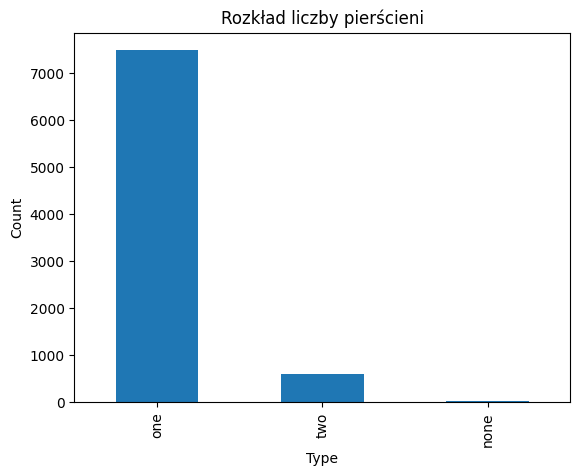

NAN:  36


In [14]:
df_pd['ring_number'].value_counts().plot(kind='bar', title='Rozkład liczby pierścieni')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

print("NAN: ", len(df_pd[df_pd['ring_number'] == "none"]['ring_number']))


#### Missing Data Analysis

We have a significant majority of mushrooms with one ring and 36 mushrooms where we do not know the number of rings. We can take a closer look at these observations.

Checking for missing data.


In [15]:
df_nan = df_pd[df_pd['ring_number'] == "none"] #the collection at first glance seems very uniform
len(df_nan['ring_number'])

36

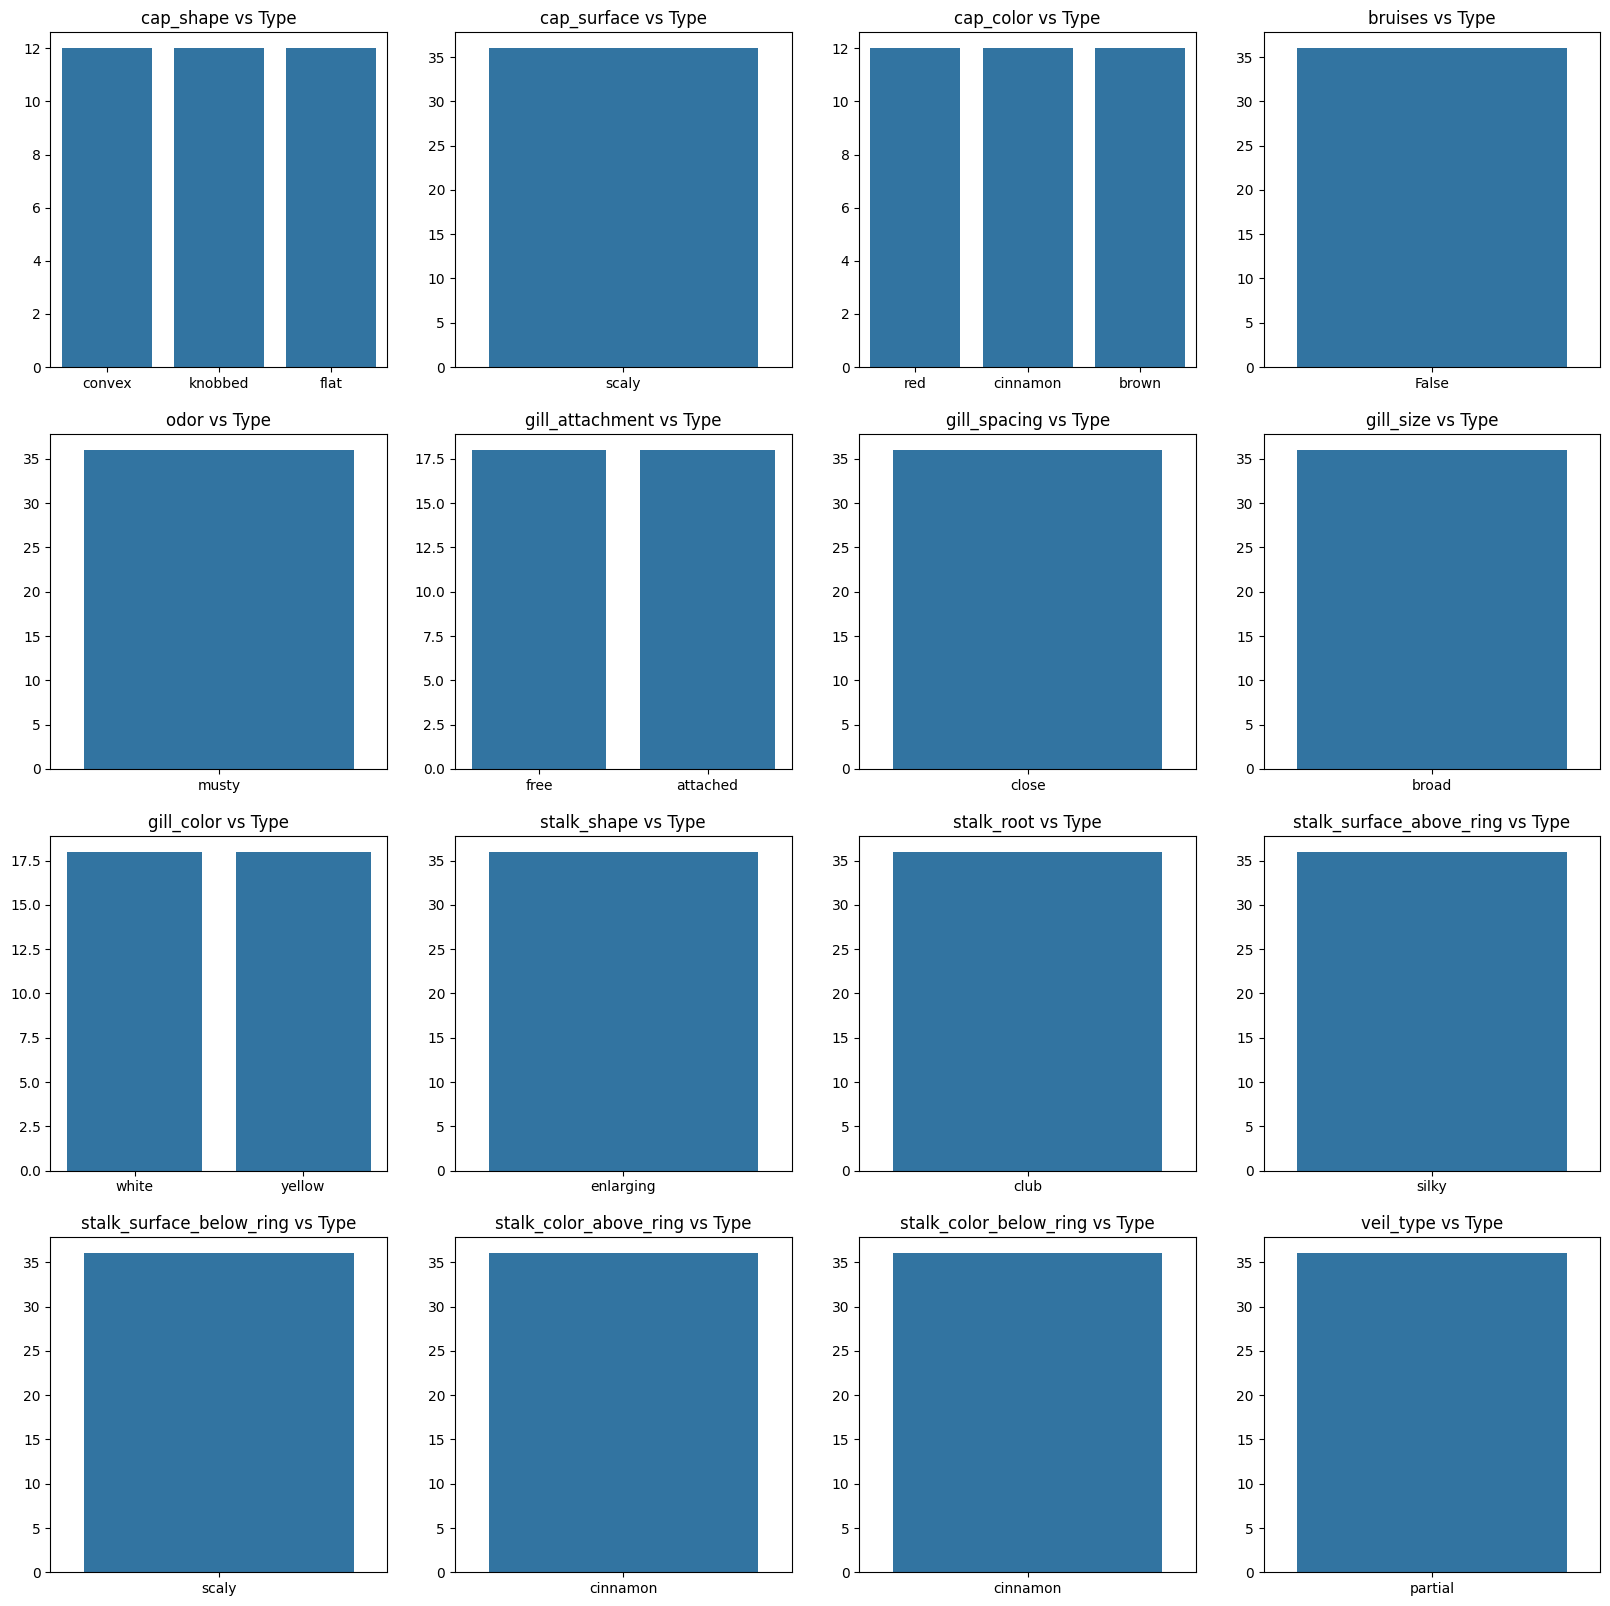

In [16]:
import seaborn as sns

fig, axes = plt.subplots(4, 4, figsize=(20, 20))

columns_to_analyze = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',
                      'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',
                      'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring',
                      'stalk_color_below_ring', 'veil_type']

for i, col in enumerate(columns_to_analyze):
    ax = axes[i//4, i%4]
    sns.countplot(x=col, data=df_nan, ax=ax)
    ax.set_title(f'{col} vs Type')
    ax.set_xlabel('')
    ax.set_ylabel('')

Wszystkie obserwacje z brakującą zmienną `ring_number` są trujące i mają bardzo zbliżone wartości innych cech. Wygląda to podejżanie, bo nawet kiedy cechy nie mają jednej wartości to są niemal równo podzielone na dwie grupy po 18 lub 3 po 13 obserwacji.

Należy sprawidzić jak wygląda rozkład w pozostałych kategoriach `ring number`. Jeśli wygląda podobnie to możemy założyć, że nie udało się zebrać tylko tej jednej zmiennej jeśli rozkład jest bardziej zróżnicowany to "none" w tym przypadku zapewne nie oznacza braku danych tylko brak pierścieni na nóżce grzyba.

600


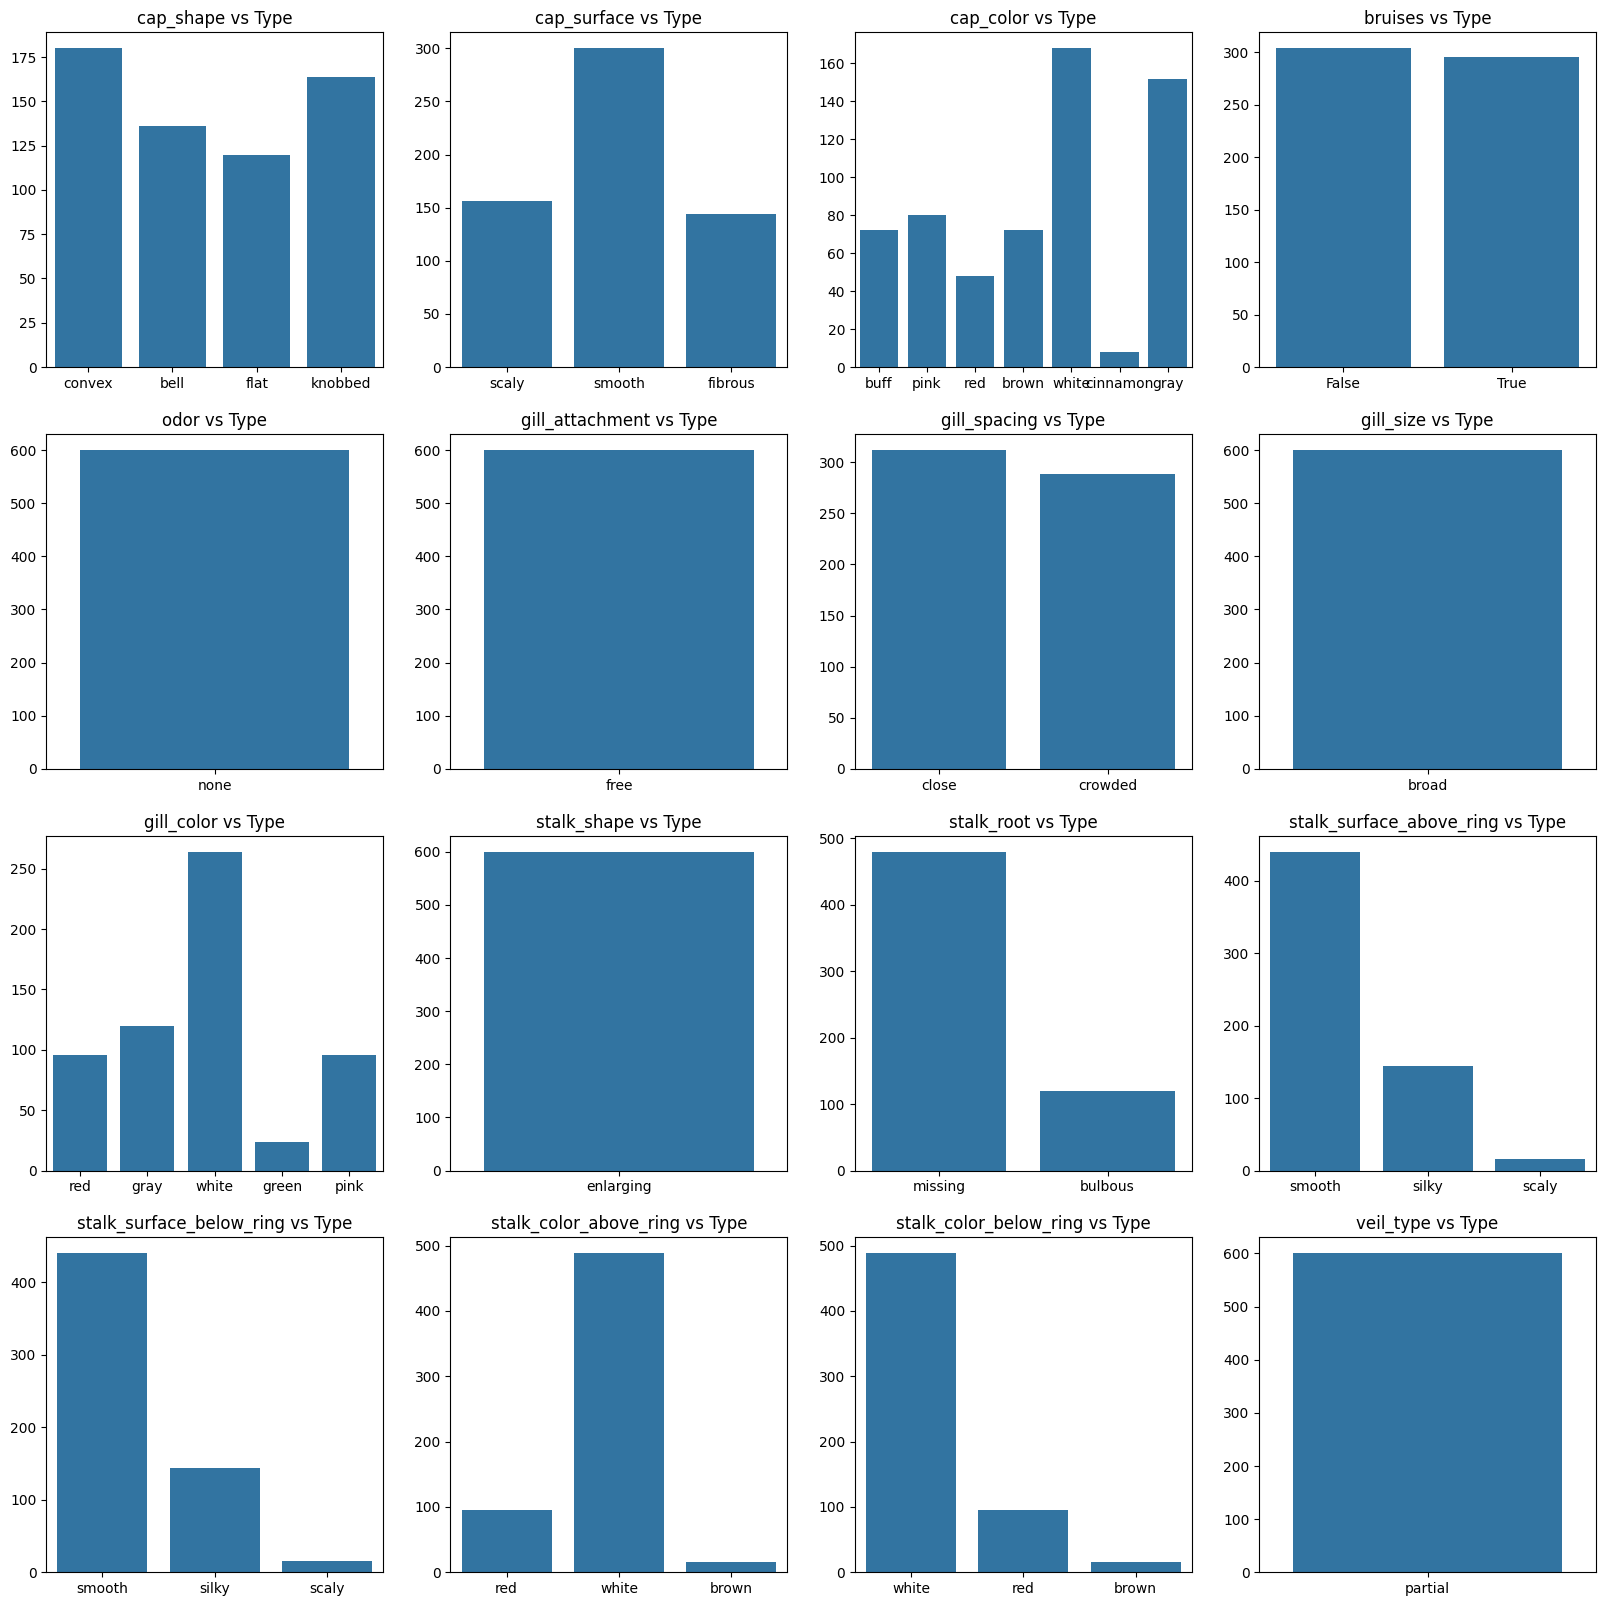

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

df_2_rings = df_pd.loc[df_pd.loc[:, "ring_number"] == "two", :]
print(len(df_2_rings))

columns_to_analyze = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',
                      'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',
                      'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring',
                      'stalk_color_below_ring', 'veil_type']

for i, col in enumerate(columns_to_analyze):
    ax = axes[i//4, i%4]
    sns.countplot(x=col, data=df_2_rings, ax=ax)
    ax.set_title(f'{col} vs Type')
    ax.set_xlabel('')
    ax.set_ylabel('')

Based on the differences between all classes, it was decided to treat the value "none" as zero rings and replace this value with zero (0).

In [ ]:
df_pd.loc[df_pd.loc[:, "ring_number"] == "none", 'ring_number'] = 0
df_pd.loc[df_pd.loc[:, "ring_number"] == "one", 'ring_number'] = 1
df_pd.loc[df_pd.loc[:, "ring_number"] == "two", 'ring_number'] = 2
df_pd["ring_number"].value_counts()

ring_number
1    7488
2     600
0      36
Name: count, dtype: int64

### Distribution of the `type` Variable

The dataset strongly suggests a classification task. Since the `type` variable seems to be a natural candidate for the target variable in such an analysis, we can check its distribution.


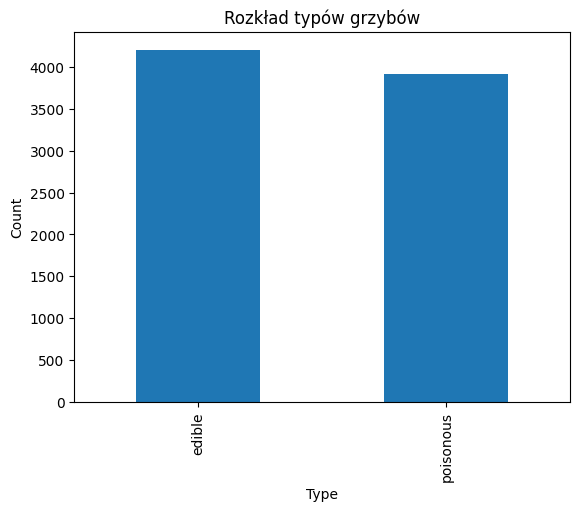

In [18]:

df_pd['type'].value_counts().plot(kind='bar', title='Rozkład typów grzybów')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


There are almost as many poisonous and edible mushrooms, which speaks in favor of the possible model.

We can check the distribution of the rest of the variables in relation to `type`.

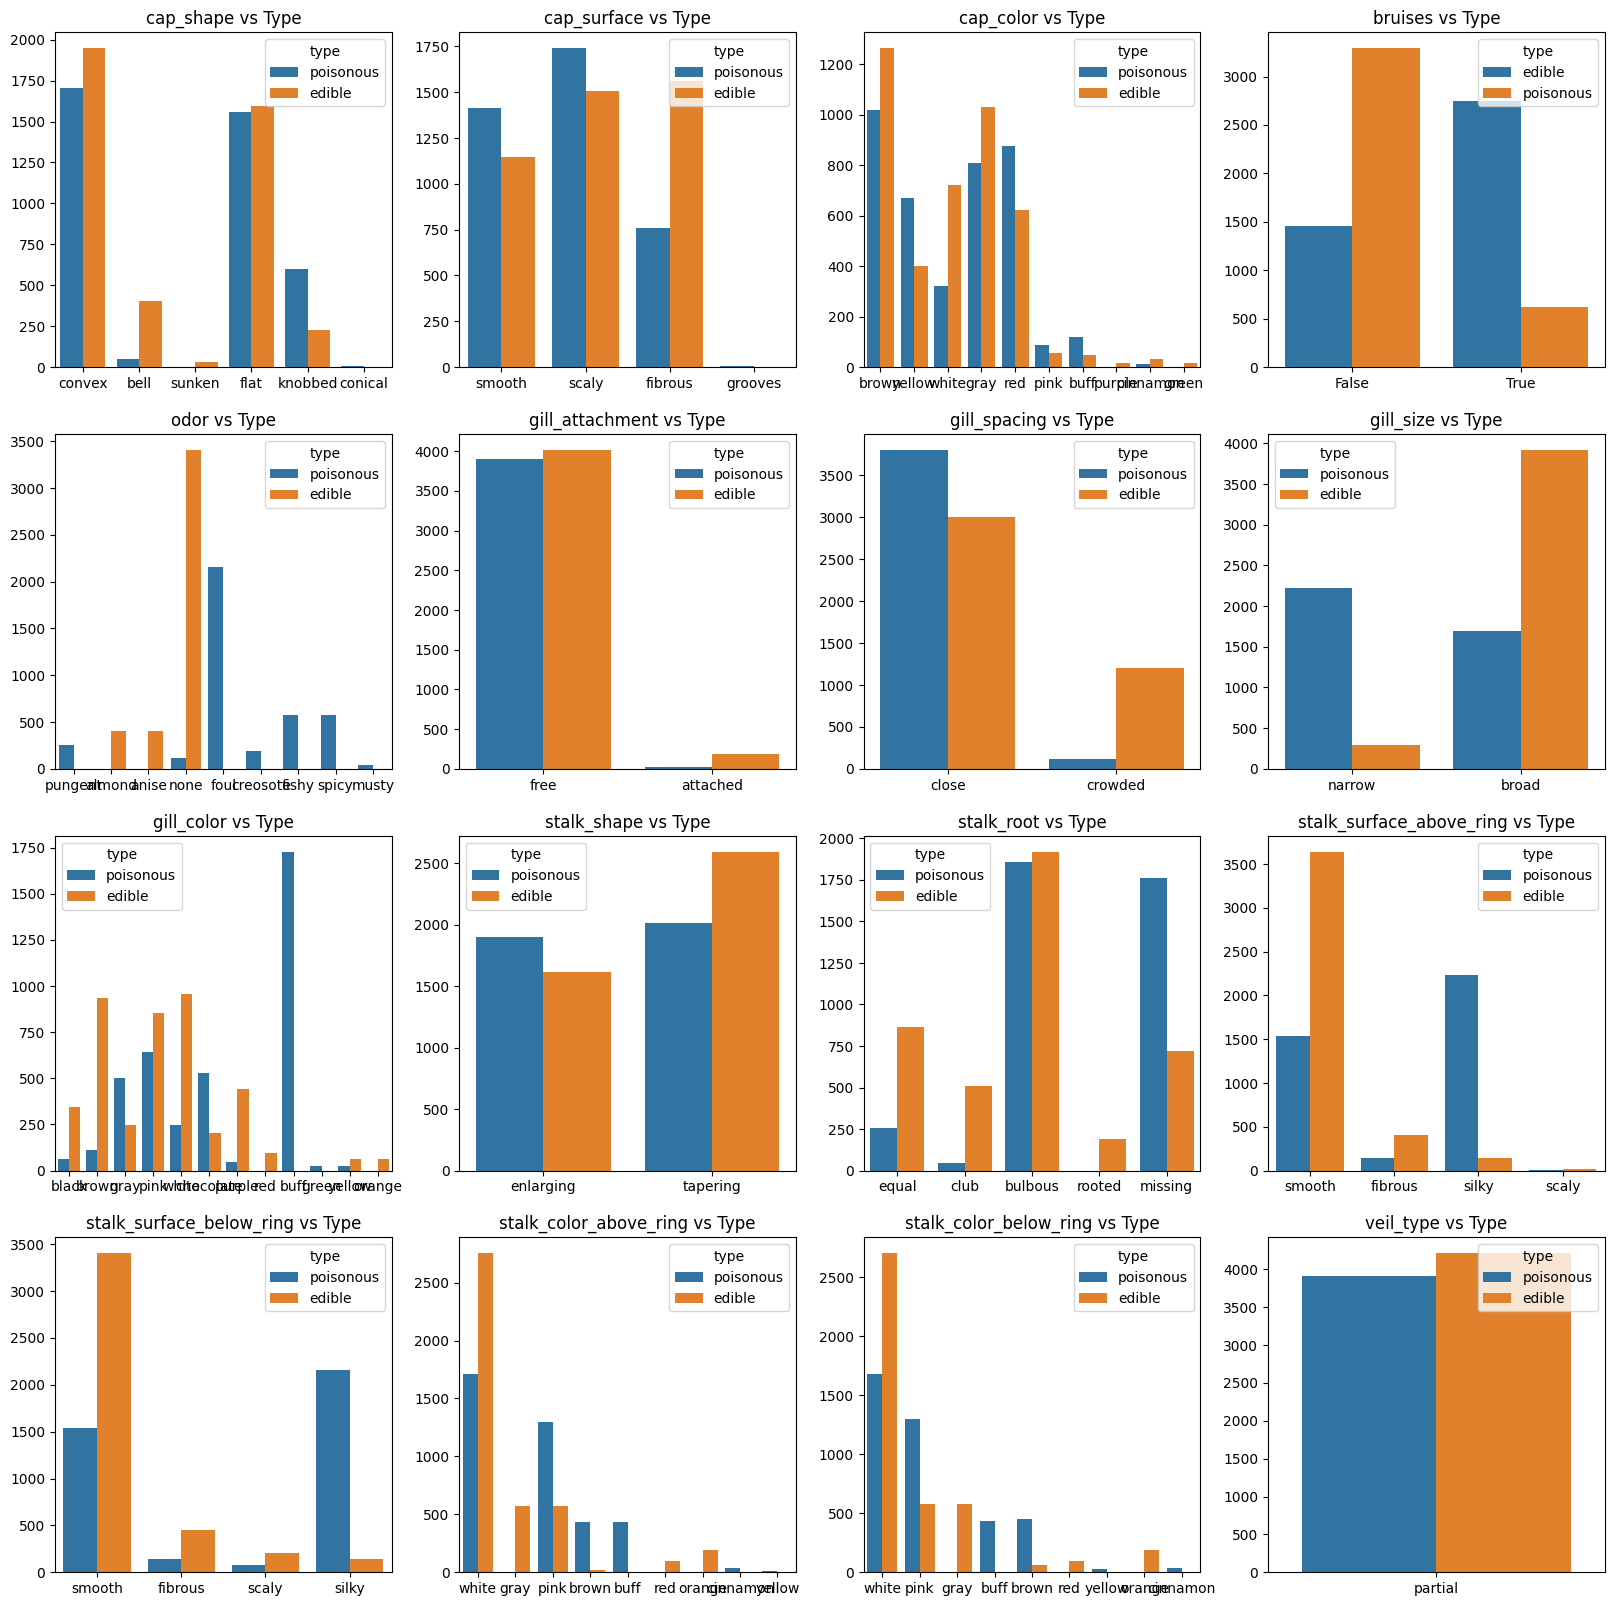

In [20]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

columns_to_analyze = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',
                      'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',
                      'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring',
                      'stalk_color_below_ring', 'veil_type']

for i, col in enumerate(columns_to_analyze):
    ax = axes[i//4, i%4]
    sns.countplot(x=col, hue='type', data=df_pd, ax=ax)
    ax.set_title(f'{col} vs Type')
    ax.set_xlabel('')
    ax.set_ylabel('')

Several categories appear to be missing altogether. This should be checked.

In [21]:
print(len(df_pd[df_pd["cap_surface"] == "grooves"])) #values ​​are few but they exist
print(len(df_pd[df_pd["cap_shape"] == "conical"])) #values ​​are few but they exist

4
4


The data is there though, everything is fine 🙂

# Model

### Correlation Analysis

No other anomalies are visible in the data, so we can proceed to modeling.

As initially suggested, we will conduct a classification to determine whether a mushroom is edible or poisonous.

Predictor: `type`

First, let's identify the best-correlated explanatory variables.


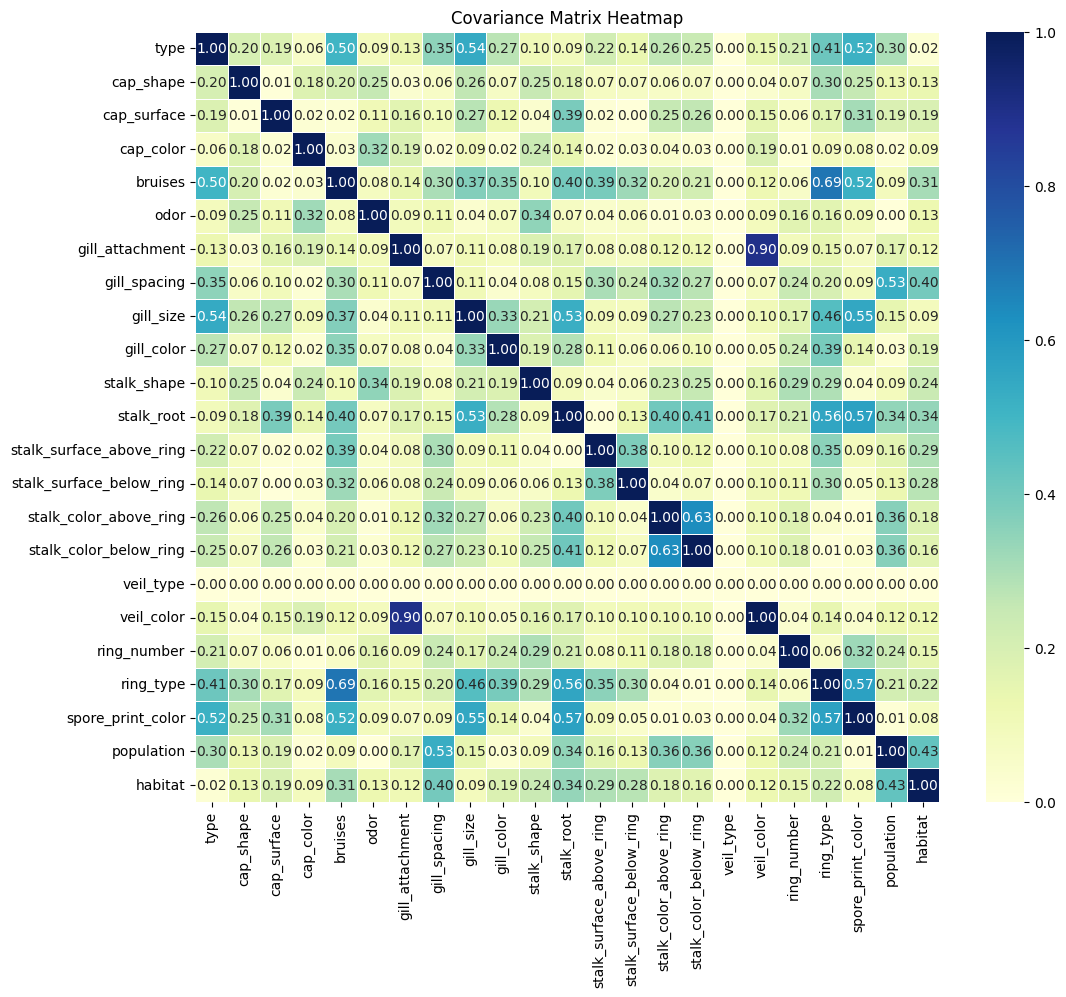

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()
df_encoded = df_pd.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
train_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

cov_matrix = abs(train_scaled.cov())

plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()


### Variables with the Highest Correlation Coefficients

The variables with the highest correlation coefficients with `type` are:
* bruises
* gill_spacing
* gill_size
* gill_color
* stalk_color_above_ring
* stalk_color_below_ring
* ring_type
* spore_print_color
* population

All these variables have a correlation with the `type` variable above 25%. We can take a closer look at them and create a table with just these variables to check their correlation among themselves. A smaller matrix will be more convenient for analysis.


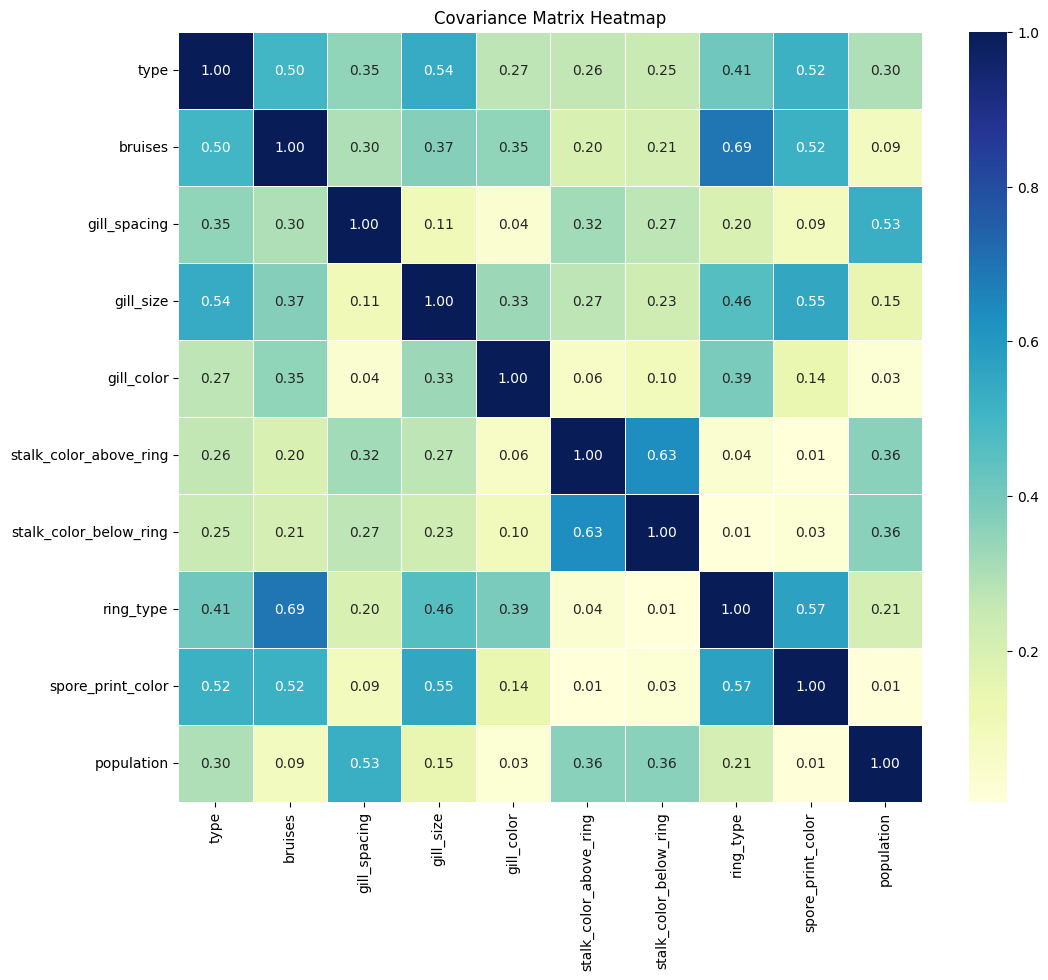

In [23]:
label_encoder = LabelEncoder()
scaler = StandardScaler()
df_encoded = df_pd.loc[:, ('type', 'bruises', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_color_above_ring', 'stalk_color_below_ring', 'ring_type', 'spore_print_color', 'population')].apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
train_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

cov_matrix = abs(train_scaled.cov())

plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

High correlation (above 45%) exists between the following variables:
* bruises - ring_type, **spore_print_color**
* gill_spacing - **population**
* **gill_size** - spore_print_color, ring_type
* **stalk_color_above_ring** - stalk_color_below_ring
* ring_type - **spore_print_color**

The variables in bold are the most correlated with the target variable from the group of correlated variables. These will be chosen as the starting variables for modeling, and if the model shows potential for improvement, forward selection will be used.

**First group of explanatory variables: spore_print_color, population, gill_size, stalk_color_above_ring.**


In [24]:
df_pd.columns

Index(['type', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

### Model Selection

Since we are dealing with a classification problem, modeling will be performed using the following models:

1. **Logistic Regression**
   * **Model Specifics:** A simple linear model that performs well for binary classification.
   * **Data:** The mushroom data is categorical, which is suitable for logistic regression after appropriate encoding (e.g., one-hot encoding).
   * **Advantages:** Easy to interpret, quick to train, less prone to overfitting with smaller datasets.

2. **Decision Tree**
   * **Model Specifics:** Decision trees are non-parametric models that partition the feature space into classification regions.
   * **Data:** Handles categorical data well without the need for encoding, which is advantageous for our mushroom data.
   * **Advantages:** Easy to interpret, can capture complex relationships in data, works well with a mix of categorical and continuous data.

3. **Random Forest**
   * **Model Specifics:** An ensemble classification model that combines multiple decision trees to improve accuracy and stability.
   * **Data:** Similar to decision trees, handles categorical data effectively.
   * **Advantages:** Reduces the risk of overfitting compared to a single decision tree, more accurate and stable, can handle missing values well.

4. **Support Vector Machine (SVM)**
   * **Model Specifics:** SVM seeks the hyperplane that best separates the classes.
   * **Data:** Can be applied to categorical data after encoding (e.g., one-hot encoding). SVM can perform well when the number of features is large compared to the number of samples.
   * **Advantages:** Effective in high-dimensional spaces, works well even when the number of features exceeds the number of samples.

5. **Gradient Boosting (e.g., XGBoost)**
   * **Model Specifics:** An ensemble model that builds decision trees sequentially, with each subsequent model correcting the errors of the previous one.
   * **Data:** Like decision trees and random forests, handles categorical data well.
   * **Advantages:** High accuracy, especially effective for large and complex datasets, good generalization properties.


Logistic Regression:

Accuracy: 0.8184615384615385
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       843
           1       0.85      0.75      0.80       782

    accuracy                           0.82      1625
   macro avg       0.82      0.82      0.82      1625
weighted avg       0.82      0.82      0.82      1625



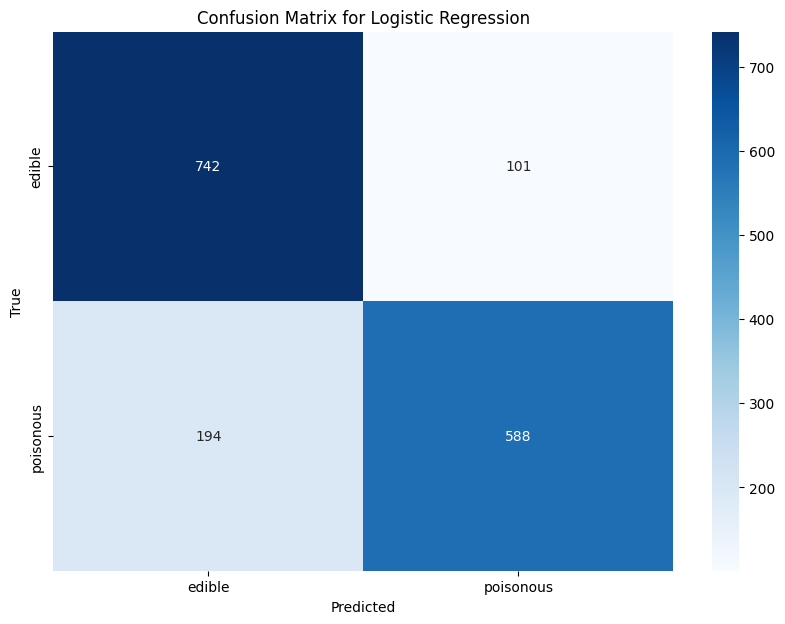

----------------------------------------------------------------------------------------------------
Decision Tree:

Accuracy: 0.9766153846153847
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       843
           1       0.95      1.00      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



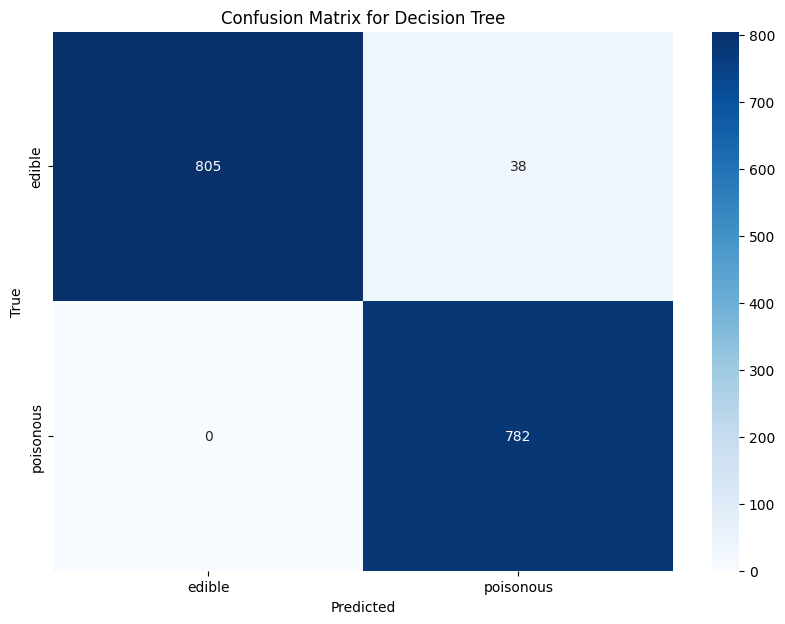

----------------------------------------------------------------------------------------------------
Random Forest:

Accuracy: 0.9766153846153847
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       843
           1       0.95      1.00      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



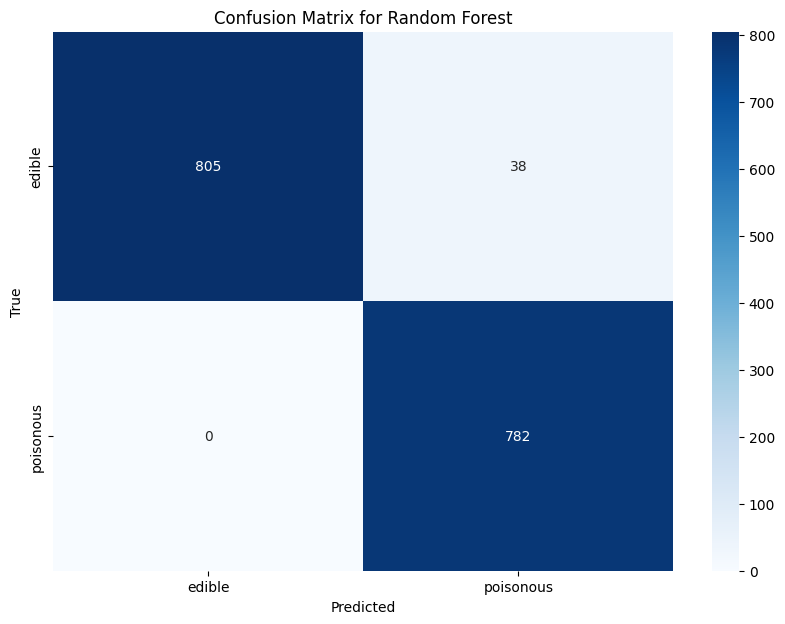

----------------------------------------------------------------------------------------------------
SVM:

Accuracy: 0.9556923076923077
              precision    recall  f1-score   support

           0       1.00      0.91      0.96       843
           1       0.92      1.00      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



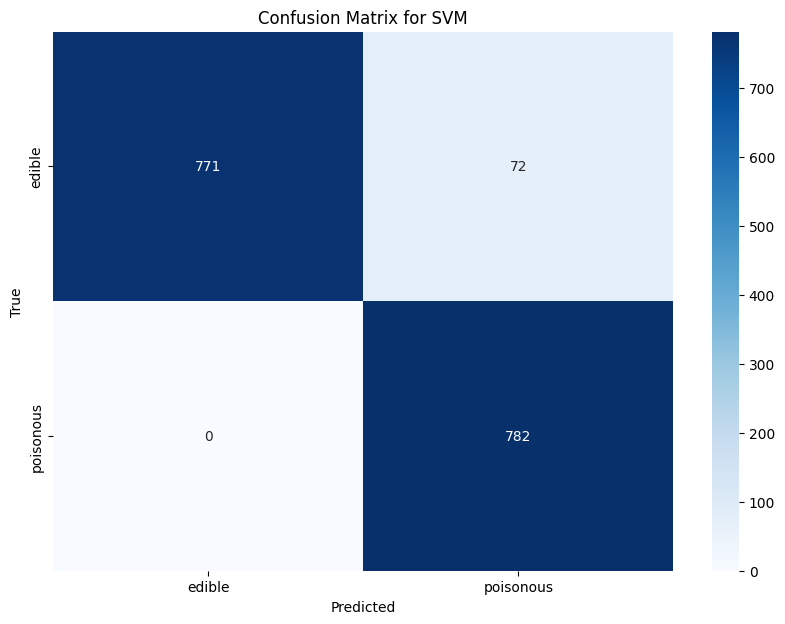

----------------------------------------------------------------------------------------------------
Gradient Boosting:

Accuracy: 0.9766153846153847
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       843
           1       0.95      1.00      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



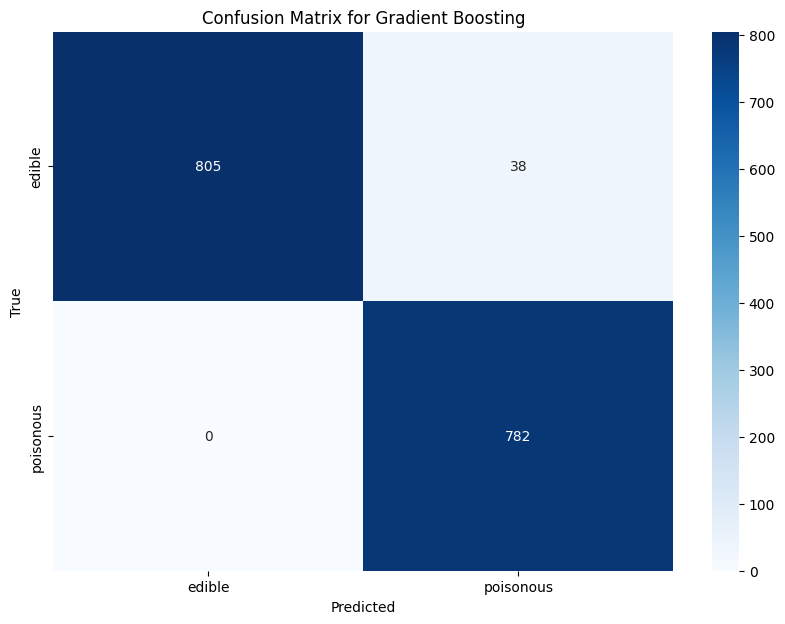

----------------------------------------------------------------------------------------------------


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = df_pd.loc[: ,( "type", 'spore_print_color', 'population', 'gill_size', 'stalk_color_above_ring')]


label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


X = data.drop('type', axis=1)
y = data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    print(f'{model_name}:\n')
    print(f'Accuracy: {accuracy}')
    print(report)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['type'].classes_, yticklabels=label_encoders['type'].classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print('-'*100)

### Next Steps and Evaluation

**Logistic Regression:** For this model, further evaluation can be conducted to see if the balance between precision and recall, particularly for class 1, can be improved. Consider tuning hyperparameters or adding more features.

**Decision Tree, Random Forest, Gradient Boosting:** Despite high accuracy, there is a risk of overfitting. Further evaluation may include:

* **Cross-validation:** To ensure the model generalizes well to new data.
* **Pruning** (for Decision Tree): To reduce the complexity of the tree and prevent overfitting.
* **Hyperparameter Tuning** (for Random Forest and Gradient Boosting): Using techniques such as Grid Search or Random Search to find optimal parameters.

**SVM:** The model achieves high accuracy but also shows differences in recall between classes. Consider hyperparameter tuning (e.g., changing the kernel, regularization) or using oversampling/undersampling methods to balance classes in the training set.

The results based on the selected 4 variables are sufficiently good that further feature propagation is not necessary. Focus should be on balancing precision and recall and addressing potential overfitting.


Tuning and evaluating Logistic Regression...
Logistic Regression cross-validation f1 scores: [0.83959044 0.84361792 0.84596577 0.84300341 0.83276451]
Logistic Regression cross-validation mean f1 score: 0.840988410497378
Logistic Regression best parameters: {'C': 10}
Logistic Regression test accuracy: 0.8332307692307692
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       843
           1       0.86      0.78      0.82       782

    accuracy                           0.83      1625
   macro avg       0.84      0.83      0.83      1625
weighted avg       0.84      0.83      0.83      1625



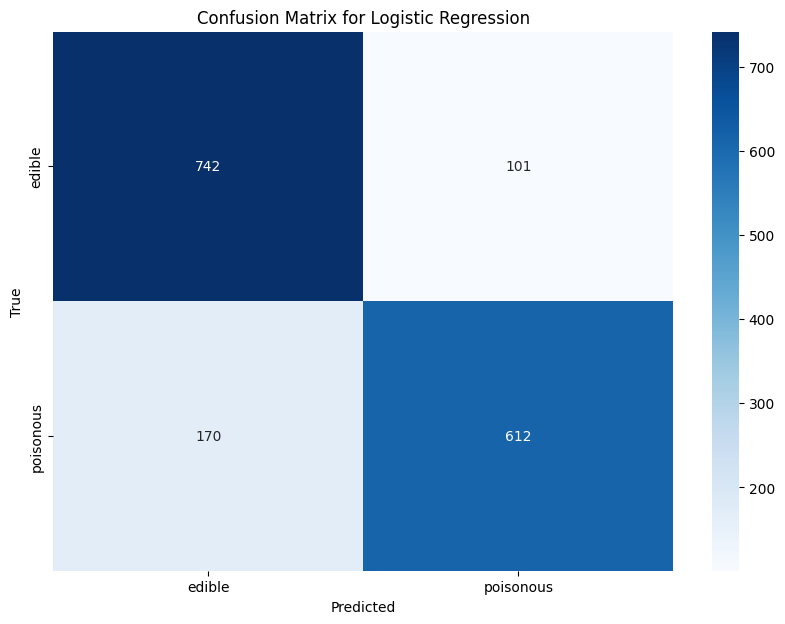

----------------------------------------------------------------------------------------------------
Tuning and evaluating Decision Tree...
Decision Tree cross-validation f1 scores: [0.98895899 0.98507463 0.97815913 0.98122066 0.98350353]
Decision Tree cross-validation mean f1 score: 0.9833833872001587
Decision Tree best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree test accuracy: 0.9766153846153847
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       843
           1       0.95      1.00      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



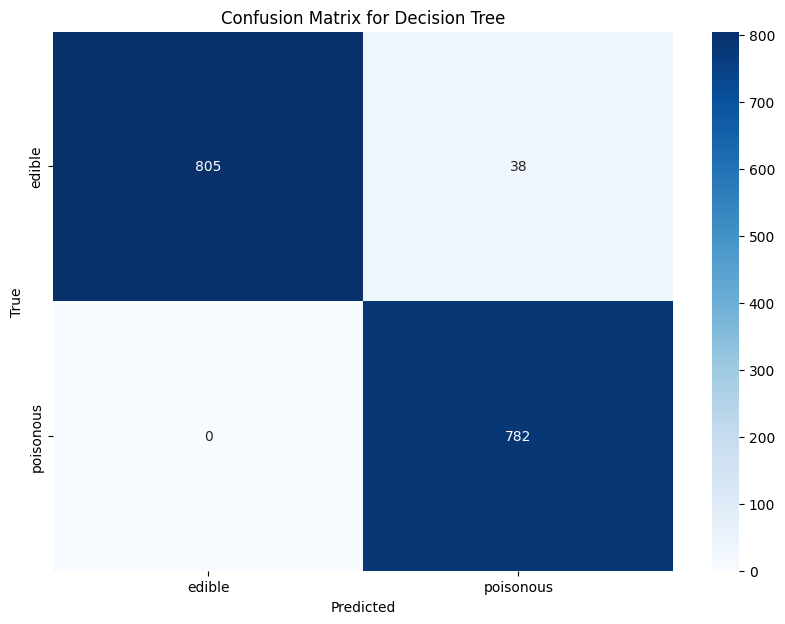

----------------------------------------------------------------------------------------------------
Tuning and evaluating Random Forest...


In [ ]:
from sklearn.model_selection import  GridSearchCV, cross_val_score

models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10, 100]
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    }),
    'SVM': (SVC(), {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7, 10]
    })
}

for model_name, (model, param_grid) in models.items():
    print(f'Tuning and evaluating {model_name}...')
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_


    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1')
    print(f'{model_name} cross-validation f1 scores: {cv_scores}')
    print(f'{model_name} cross-validation mean f1 score: {cv_scores.mean()}')


    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f'{model_name} best parameters: {grid_search.best_params_}')
    print(f'{model_name} test accuracy: {accuracy}')
    print(report)


    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['type'].classes_, yticklabels=label_encoders['type'].classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print('-'*100)


### Model Evaluation

1. **Logistic Regression:**
   * **Accuracy:** 83.32%
   * **Mean F1-score (CV):** 84.10%
   * **F1-score for Class 0 (Edible):** 85%
   * **F1-score for Class 1 (Poisonous):** 82%
   * **Conclusions:** Logistic Regression achieves decent results but is clearly outperformed by more advanced models. Despite hyperparameter tuning, this model may be limited in handling more complex data.

2. **Decision Tree:**
   * **Accuracy:** 97.66%
   * **Mean F1-score (CV):** 98.34%
   * **F1-score for Class 0 (Edible):** 98%
   * **F1-score for Class 1 (Poisonous):** 98%
   * **Conclusions:** Decision Tree achieves very high accuracy, indicating that the model handles classification well. However, it is susceptible to overfitting, which may become evident with further evaluation.

3. **Random Forest:**
   * **Accuracy:** 97.66%
   * **Mean F1-score (CV):** 98.34%
   * **F1-score for Class 0 (Edible):** 98%
   * **F1-score for Class 1 (Poisonous):** 98%
   * **Conclusions:** Random Forest delivers comparable results to Decision Tree but is more stable and less prone to overfitting due to averaging results from multiple decision trees.

4. **SVM:**
   * **Accuracy:** 97.66%
   * **Mean F1-score (CV):** 98.34%
   * **F1-score for Class 0 (Edible):** 98%
   * **F1-score for Class 1 (Poisonous):** 98%
   * **Conclusions:** SVM with the "rbf" kernel also achieves very high results, suggesting that the model is well-suited to the data. SVM is known for its good generalization.

5. **Gradient Boosting:**
   * **Accuracy:** 97.66%
   * **Mean F1-score (CV):** 98.34%
   * **F1-score for Class 0 (Edible):** 98%
   * **F1-score for Class 1 (Poisonous):** 98%
   * **Conclusions:** Gradient Boosting delivers results comparable to Random Forest and SVM. This model effectively detects patterns in the data and handles difficult cases well.

**Recommended Models:** Random Forest, Gradient Boosting, and SVM. Overall, the models show very good results, suggesting that the data might be artificially generated since the results are exceptionally good. These models have been selected as the best due to their very low second-order error rates. It is crucial to minimize false negatives in this case because missing an edible mushroom is less consequential than misidentifying a poisonous one.
